In [1]:
import numpy as np, random
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy

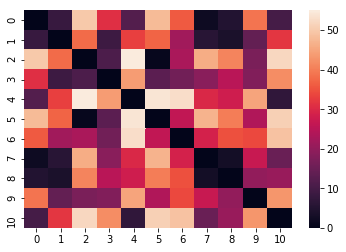

[[ 0  8 50 31 12 48 36  2  5 39 10]
 [ 8  0 38  9 33 37 22  6  4 14 32]
 [50 38  0 11 55  1 23 46 41 17 52]
 [31  9 11  0 44 13 16 19 25 18 42]
 [12 33 55 44  0 54 53 30 28 45  7]
 [48 37  1 13 54  0 26 47 40 24 51]
 [36 22 23 16 53 26  0 29 35 34 49]
 [ 2  6 46 19 30 47 29  0  3 27 15]
 [ 5  4 41 25 28 40 35  3  0 20 21]
 [39 14 17 18 45 24 34 27 20  0 43]
 [10 32 52 42  7 51 49 15 21 43  0]]


In [2]:
d_mat=np.loadtxt('trail.txt', dtype='int')    # German_cities.txt
ax = sns.heatmap(d_mat)
plt.show()
print(d_mat)

I have taken datasets from here ::
https://people.sc.fsu.edu/~jburkardt/datasets/cities/cities.html

In [3]:
def cities(num_routes,N):
    city=[]
    for i in range(num_routes):
        r= random.sample(range(0,N),N)
        city.append(r)   
    return city


I have considered randomly few city combinations and produced population/distance connection according to it to form a full loop

In [4]:
def population(N,number_of_routes,cities,matrix):
    qwe1=[]
    n_r =number_of_routes
    for i in range(1,n_r+1):    # 1,N+1
        for j in range(0,N):        # 0,N
            qwe1.append((cities[i-1][j-1], cities[i-1][j])) 
            y = list(qwe1[q:q+N] for q in range(0,len(qwe1),N)) 
    #print (y)
    yu=[]
    for j in range (0,n_r):     # n_routes
        u=y[j]
        for i in range(0, N):   #matrix
            yu.append(matrix[u[i]])     
            population = list(yu[q:q+N] for q in range(0, len(yu),N))      
    return population

In [5]:
def fitness_pop(population):
    fitness = list(map(sum,population))
    return fitness

Fitness function is defined as per the problem, lesser the distance = lesser the fitness value = better the solution.

In [6]:
def matingpool(population,fitness,number_of_parents,random_number):
    par=[]
    for i in range (0,number_of_parents):
        min_fit = np.min(fitness)  
        min_fitness_id = np.where(fitness == min_fit)
        min_fitness_id = min_fitness_id[0][0]
        #print(min_fit)
        fitness[min_fitness_id] = random_number
        par.append(population[min_fitness_id])
    return par

choosing parents with minimum fitness value to get better results for further process

In [7]:
def mp_parents(number_of_parents,matingpool, population, cities):
    parent_cities=[]
    for i in range (0,number_of_parents): #no. of parents
        c_index= population.index(matingpool[i])
        #print(c_index)
        parent_cities.append(cities[c_index])
        #print(parent_cities)
    return parent_cities

Ordered Crossover technique for permutation problems: and m,n are considered as crossover points and the rest are filled as per the position without repeating.

In [8]:
def crossover (N,sel_par):
    n=int(N/2)-1
    m=int(n-2)
    #print(m,n)
    offspring = []
    for first, second in zip(range(0,3,2),range(1,4,2)): 
        p_1 = sel_par[first]
        p_2 = sel_par[second]
        r1,r2 = [True]*N, [True]*N
        for i in range (N):
            if i<m or i>n:
                r1[p_2[i]]=False
                r2[p_1[i]]=False
        temp1,temp2 = p_1, p_2
        C1,C2 = n+1,n+1
        for i in range(N):
            if not r1[temp1[(i + n + 1) % N]]:
                p_1[C1 % N] = temp1[(i + n + 1) % N]
                C1 += 1
            if not r2[temp2[(i + n + 1) % N]]:
                p_2[C2 % N] = temp2[(i + n + 1) % N]
                C2 += 1
        for i in range(m, n + 1):
            p_1[i], p_2[i] = p_2[i], p_1[i]
        
        offspring.append(p_1)
        offspring.append(p_2)
        #print(offspring)
    return (offspring)

Scramble Mutation technique for Combinatorial, permutation problem: s_num and e_num are considered randomly and one can change them accordingly to shuffle over

In [9]:
def mutate (crossover1, N):
    for i in crossover1:
        s_num = 1      #int(N/2)
        e_num = 4      #N-2
        tmp = i[s_num:e_num]
        random.shuffle(tmp)
        i[s_num:e_num] = tmp
        #print(i)
    return crossover1


In [10]:
def new_generations(city):
    pop= population(N,len(city),city,d_mat)
    fit1 = fitness_pop(pop)
    mp= matingpool (pop,fit1,num_par,random_num)
    selected_parents= mp_parents(num_par,mp,pop,city)
    old_pop = deepcopy(selected_parents)

    offsprings = crossover(N,selected_parents)
    mutated_pop = mutate(offsprings, N) 
    
    new_generation=[]
    new_generation[0:len(old_pop)] = deepcopy(old_pop)
    new_generation[len(old_pop):]=deepcopy(mutated_pop)
    
    return new_generation

In [11]:
def new_gen_fitness(generation):
    pop_new = population(N,len(generation),generation,d_mat)
    fit_new = fitness_pop(pop_new)
    return fit_new

In [12]:
N= len(d_mat)
number_of_routes = 16
num_par = 4    #number of parents
random_num = 10000
num_generation=7


N = length of input matrix
number of routes are the number of possible combinations of cities connection, can consider any number within n!
Number of parents are 4
random number is considered just to ignore the already read data in the loop and opt for higher number for higher datasets
number of generations are 7


In [13]:
for geners in range(0,num_generation):
    if geners == 0:
        print("Generation :", geners)
        city = cities(number_of_routes,N)
        generatn = new_generations (city)
        
        #pop_1= population(N,len(generatn),generatn,d_mat)
        #fit_1 = fitness_pop(pop_1)
        
        fit_1 = new_gen_fitness(generatn)
        best_min_fitness = np.where(fit_1==np.min(fit_1))
        best_fit = list(best_min_fitness[0])

        print("Best solution-City Route(Population): ", generatn[best_fit[0]])
        print("Best solution-DistanceSum(Fitness):", fit_1[best_fit[0]])
    else:
        print("Generation :", geners)
        city = generatn
        #print("first:", generatn)
        next_geners = new_generations (city)
        #print("next:", next_geners)
        generatn = deepcopy(next_geners)
        
        #pop_new= population(N,len(next_geners),next_geners,d_mat)
       # fit_new = fitness_pop(pop_new)
        
        fit_new = new_gen_fitness(next_geners)
        best_min_fitness = np.where(fit_new==np.min(fit_new))
        best_fit = list(best_min_fitness[0])

        print("Best solution-City Route(Population): ", next_geners[best_fit[0]])
        print("Best solution-DistanceSum(Fitness):", fit_new[best_fit[0]])
        

Generation : 0
Best solution-City Route(Population):  [9, 2, 4, 10, 0, 3, 5, 6, 8, 7, 1]
Best solution-DistanceSum(Fitness): 217
Generation : 1
Best solution-City Route(Population):  [9, 2, 4, 10, 0, 3, 5, 6, 8, 7, 1]
Best solution-DistanceSum(Fitness): 217
Generation : 2
Best solution-City Route(Population):  [9, 2, 4, 10, 0, 3, 5, 6, 8, 7, 1]
Best solution-DistanceSum(Fitness): 217
Generation : 3
Best solution-City Route(Population):  [9, 2, 4, 10, 0, 3, 5, 6, 8, 7, 1]
Best solution-DistanceSum(Fitness): 217
Generation : 4
Best solution-City Route(Population):  [9, 2, 4, 10, 0, 3, 5, 6, 8, 7, 1]
Best solution-DistanceSum(Fitness): 217
Generation : 5
Best solution-City Route(Population):  [10, 0, 6, 5, 3, 8, 7, 1, 9, 2, 4]
Best solution-DistanceSum(Fitness): 212
Generation : 6
Best solution-City Route(Population):  [10, 0, 6, 5, 3, 8, 7, 1, 9, 2, 4]
Best solution-DistanceSum(Fitness): 212
